## Step-by-Step PCA

### Step 1: Mean Center the Data
For each feature, subtract its mean:

X_centered = X − μ

Why?
- PCA is about variance
- Variance must be measured around the mean
- This shifts the data so that it is centered at the origin

---

### Step 2: Compute the Covariance Matrix
Calculate the covariance between every pair of features:

Σ = cov(X_centered)

Why?
- Variance alone does not capture relationships
- Covariance captures how features vary together
- This matrix summarizes the full data structure

---

### Step 3: Compute Eigenvalues and Eigenvectors
Solve:

Σ v = λ v

Where:
- v → eigenvectors (directions)
- λ → eigenvalues (variance along those directions)

Why?
- Eigenvectors give invariant directions
- Eigenvalues tell how much variance lies along each direction

---

### Step 4: Sort Eigenvalues and Eigenvectors
Sort eigenvalues in descending order:

λ₁ ≥ λ₂ ≥ λ₃ ≥ ...

Reorder eigenvectors accordingly.

Why?
- Largest eigenvalue = maximum variance
- Corresponding eigenvector = first principal component

---

### Step 5: Select Top k Principal Components
Choose the first k eigenvectors based on:
- Explained variance
- Cumulative variance threshold (e.g., 95%)

Why?
- Reduce dimensions
- Retain most of the information

---

### Step 6: Project the Data onto Principal Components
Project mean-centered data onto selected eigenvectors:

Z = X_centered · W

Where:
- W = matrix of selected eigenvectors
- Z = PCA-transformed data

---

### Step 7: Analyze Explained Variance
Check:
- Individual explained variance ratio
- Cumulative explained variance

Why?
- To justify the number of components retained


In [3]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

In [4]:
df.sample(10)

,feature1,feature2,feature3,target
25,0.290746,0.866975,0.982643,0
38,-0.764314,1.566504,1.548788,0
24,0.748855,2.593111,1.170818,0
15,-0.045438,1.040886,-0.094035,1
13,-0.022539,0.013422,0.935945,1
7,1.045371,0.538162,0.812119,1
29,1.425140,1.441152,0.182561,0
20,1.250737,0.186384,1.703624,0
39,0.384865,1.323546,-0.103193,0
18,-0.331617,-1.632386,0.619114,1


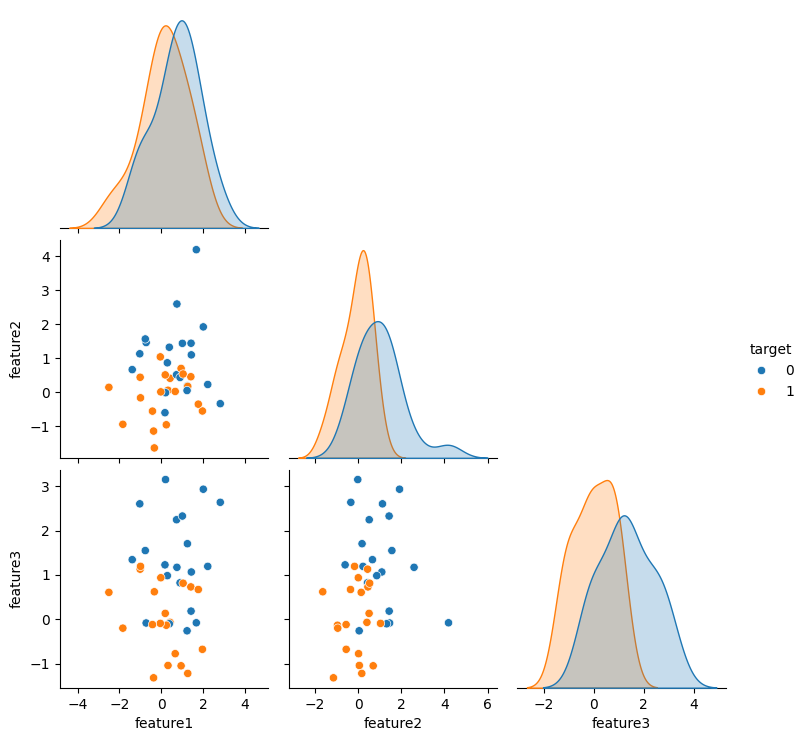

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df,
    vars=['feature1','feature2','feature3'],
    hue='target',
    corner=True
)

plt.show()

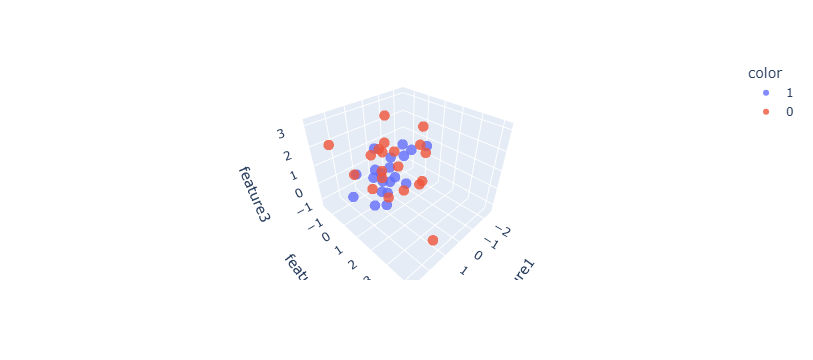

In [6]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='feature1',
    y='feature2',
    z='feature3',
    color=df['target'].astype(str),
    opacity=0.8
)

fig.update_traces(marker=dict(size=6))
fig.show()

In [7]:
# mean centering & variance scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [9]:
 # Select only feature columns
X = df.iloc[:, 0:3].values       

In [11]:
# covariance matrix
cov_matrix = np.cov(X.T)
cov_matrix

array([[1.02564103, 0.20478114, 0.080118  ],
       [0.20478114, 1.02564103, 0.19838882],
       [0.080118  , 0.19838882, 1.02564103]])

In [14]:
np.allclose(cov_matrix, cov_matrix.T)     # sanity check

True

In [15]:
## Eigenvalues & Eigenvectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [16]:
eig_vals

array([1.3536065 , 0.94557084, 0.77774573])

In [17]:
eig_vecs

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

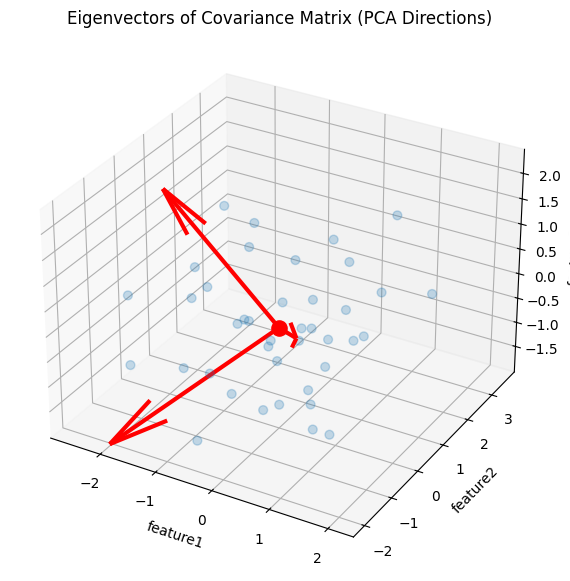

In [29]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(
    df['feature1'],
    df['feature2'],
    df['feature3'],
    alpha=0.25,
    s=40
)

# Mean of data
mean_vec = df[['feature1','feature2','feature3']].mean().values
ax.scatter(*mean_vec, color='red', s=120)

# Plot eigenvectors using quiver
for i in range(len(eig_vals)):
    v = eig_vecs[:, i]
    scale = np.sqrt(eig_vals[i]) * 3  # scale by variance

    ax.quiver(
        mean_vec[0], mean_vec[1], mean_vec[2],
        v[0], v[1], v[2],
        length=scale,
        normalize=True,
        color='red',
        linewidth=3
    )

ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')
plt.title('Eigenvectors of Covariance Matrix (PCA Directions)')
plt.show()

In [31]:
# Sort eigenvalues
idx = np.argsort(eig_vals)[::-1]

eig_vals_sorted = eig_vals[idx]
eig_vecs_sorted = eig_vecs[:, idx]

In [32]:
W = eig_vecs_sorted[:, :2]

In [33]:
W.shape

(3, 2)

In [36]:
X = df.iloc[:, 0:3].values
transformed_df = X @ W

In [37]:
new_df = pd.DataFrame(
    transformed_df,
    columns=['PC1', 'PC2']
)

In [38]:
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,2.302877,-0.757593,1
1,0.524464,0.520221,0
2,0.380275,-0.459443,1
3,0.534262,-1.773773,1
4,1.610434,1.747819,1


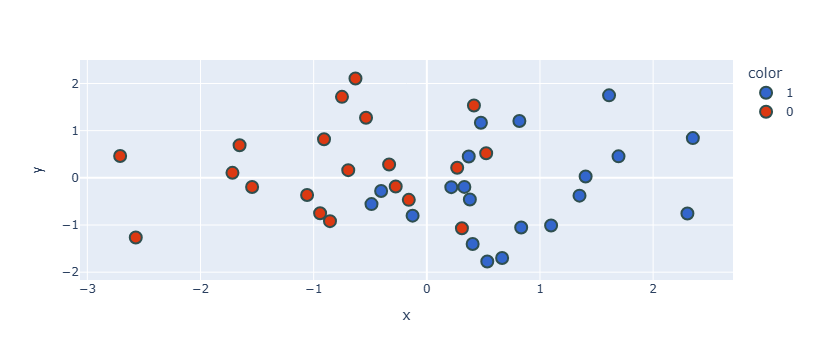

In [39]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [40]:
## here we changes the data from 3D to 2D 